## XMAC02 - Trabalho 01

Vendas de Video Games

Nomes: \
Gustavo Totti Custódio dos Santos - Matrícula 2022004233 \
Gabriel Santos do Amaral - Matrícula 2022007164 


In [26]:
import pandas as pd
from scipy.stats import binom
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st 
from scipy.stats import poisson, norm

In [27]:
df = pd.read_csv('vgsales.csv')
df.shape

(16598, 11)

### Limpeza de dados:

In [28]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Calculando a média de vendas por cada região

In [29]:
df['NA_Sales'].mean()


0.2637679238462466

In [30]:
df['EU_Sales'].mean()

0.14595794674057117

In [31]:
df['JP_Sales'].mean()

0.07780093987227378

In [32]:
df['Other_Sales'].mean()

0.04807024942764189

In [33]:
df['Global_Sales'].mean()

0.5374981923355026

##### Mostrando o tipo de cada dado

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB



##### Contando o número de linhas com valores nulos e eliminando as linhas que não possuem valores de vendas globais

In [35]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

##### Removendo as linhas que possuem valores nulos (NULL)

In [36]:
df = df.copy()
df = df.dropna()
df = df.sort_values(by = 'Year', ascending = True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1766,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
258,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
6317,6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2669,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
4025,4027,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,0.49
...,...,...,...,...,...,...,...,...,...,...,...
12388,12390,Song of the Deep,PS4,2016,Action,Insomniac Games,0.05,0.00,0.00,0.01,0.06
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


##### Agrupando os dados, para que as análises sejam feitas com mais eficácia

In [37]:
na_lista = ['NA_Sales']
eu_lista = ['EU_Sales']
jp_lista = ['JP_Sales']
lista = [['NA_Sales'],['EU_Sales'], ['JP_Sales']]
lista1 = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [38]:
anos_vendas = df.groupby(by = 'Year').sum()[lista1]

plataformas_vendas = df.groupby(by = 'Platform').sum()[lista1]
plataformas_vendas = plataformas_vendas.sort_values(by = 'Global_Sales', ascending = False)
plataformas_vendas = plataformas_vendas.query("Platform == 'Wii' | Platform == 'PS3'| Platform == 'PS4' | Platform == 'PSP' | Platform == 'XOne' | Platform == 'PSV' | Platform == 'DS' | Platform == 'X360' | Platform == 'WiiU' | Platform == '3DS'")

genero_vendas1 = df.groupby(by = 'Genre').sum()[lista1]
genero_vendas2 = df.groupby(by = 'Genre').sum()[na_lista]
genero_vendas3 = df.groupby(by = 'Genre').sum()[eu_lista]
genero_vendas4 = df.groupby(by = 'Genre').sum()[jp_lista]

### Análise de dados:

##### Número de jogos publicados pelas 5 maiores distribuidoras

In [39]:
df.groupby('Publisher')[['Name']].nunique().sort_values(by = 'Name', ascending = False).head()

,Name
Publisher,
Namco Bandai Games,774
Nintendo,662
Konami Digital Entertainment,634
Sony Computer Entertainment,620
Electronic Arts,605


##### As 5 plataformas com mais jogos publicados

In [40]:
df.groupby('Platform')[['Name']].count().sort_values(by = 'Name', ascending = False).head()


,Name
Platform,
DS,2131
PS2,2127
PS3,1303
Wii,1290
X360,1234


##### Os 10 jogos mais vendidos 

In [41]:
df[['Name', 'Platform', 'Year', 'Publisher', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

,Name,Platform,Year,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Nintendo,31.37
5,Tetris,GB,1989,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Nintendo,30.01
7,Wii Play,Wii,2006,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009,Nintendo,28.62
9,Duck Hunt,NES,1984,Nintendo,28.31


##### As 15 publicadoras com a maior quantidade de jogos vendidos

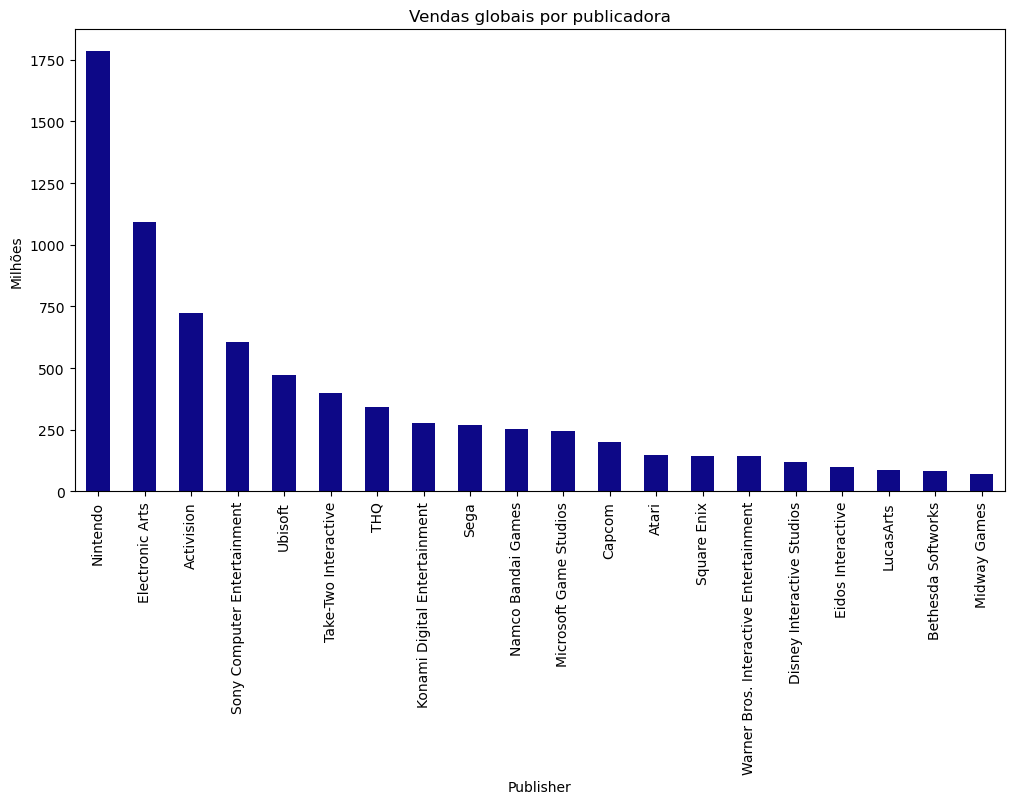

In [42]:
lmdf = df.groupby('Publisher')[['Publisher','Global_Sales']].sum().sort_values('Global_Sales', ascending = False).head(20)

lmdf['Global_Sales'].plot(kind = 'bar', 
                            figsize = (12,6), 
                            cmap = 'plasma', 
                            ylabel = 'Milhões', 
                            title = 'Vendas globais por publicadora');

##### Número de vendas por região do planeta ao longo dos anos

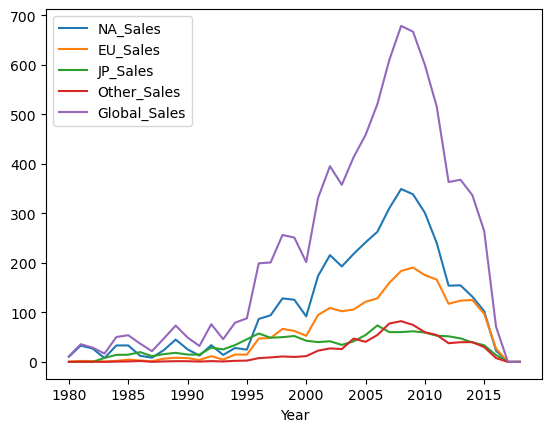

In [43]:
p1 = anos_vendas.plot(kind = 'line')

##### Convertendo agora alguns caracteres em int, para que possamos plotar o próximo gráfico

In [44]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

##### Quantidade de jogos lançados no mundo ao longo dos anos

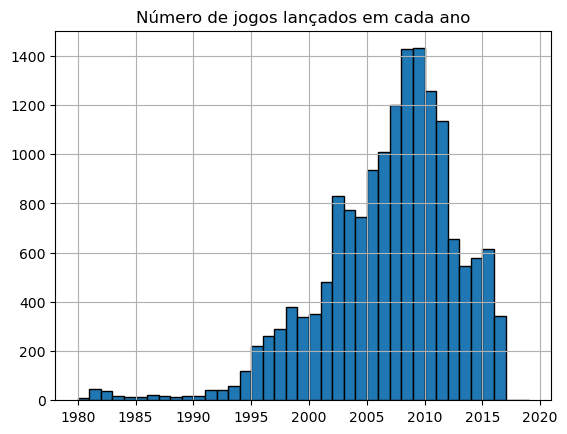

In [45]:
df.hist(column="Year", bins=range(1980,2020,1), edgecolor='black')
plt.title("Número de jogos lançados em cada ano")
plt.show()

##### Os gêneros mais populares nas principais regiões

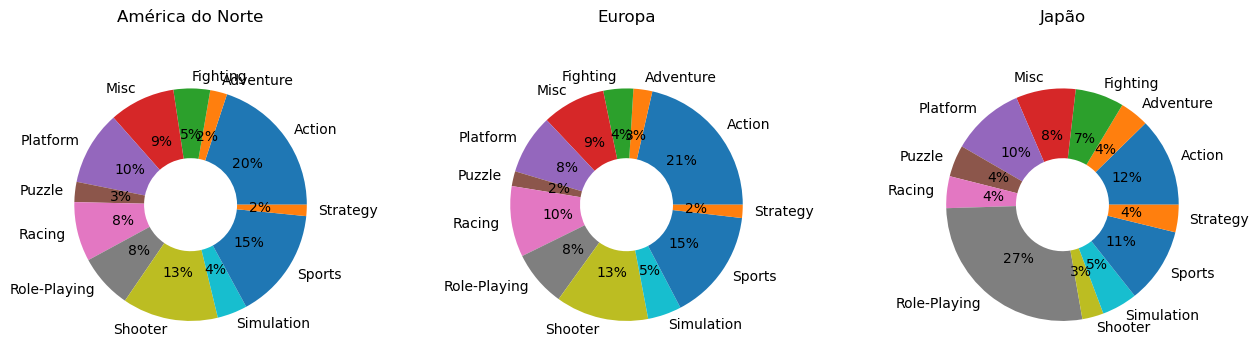

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)  

genero_vendas2.plot(kind='pie', autopct='%1.0f%%', subplots=True, ax=axes[0], legend=False, labeldistance=1.1, wedgeprops={'width': 0.6})
axes[0].set_ylabel('')
axes[0].set_title("América do Norte", y=1.10)

genero_vendas3.plot(kind='pie', autopct='%1.0f%%', subplots=True, ax=axes[1], legend=False, labeldistance=1.1, wedgeprops={'width': 0.6})
axes[1].set_ylabel('')
axes[1].set_title("Europa", y=1.10)

genero_vendas4.plot(kind='pie', autopct='%1.0f%%', subplots=True, ax=axes[2], legend=False, labeldistance=1.1, wedgeprops={'width': 0.6})
axes[2].set_ylabel('')
axes[2].set_title("Japão", y=1.10)

plt.show()



##### Popularidade de cada plataforma nas diferentes regiões com base nas vendas

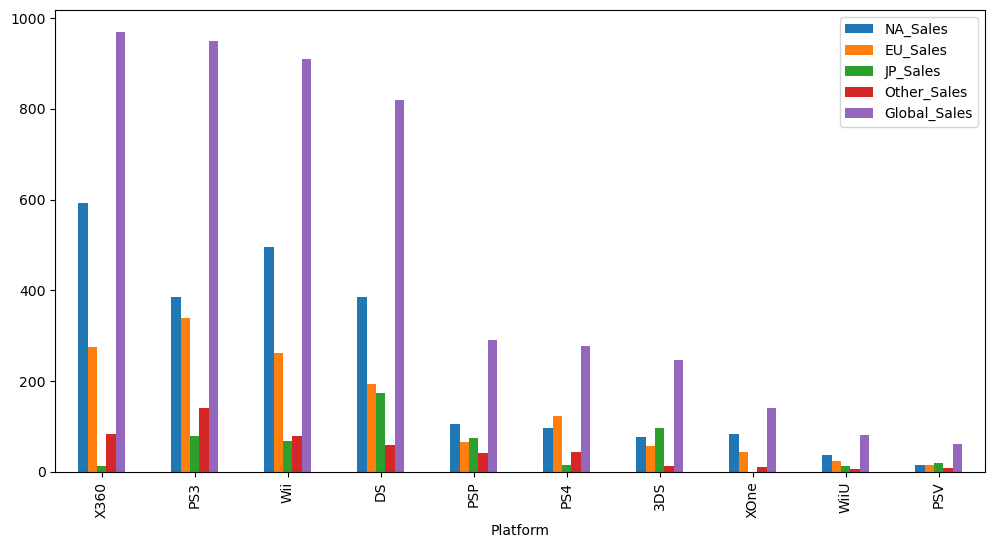

In [47]:
plataformas_vendas.plot(kind = 'bar', figsize=(12, 6))
plt.show()

##### Agora, vamos fazer uma análise isolada de duas publicadoras. Será analisado o número de vendas ao longo dos anos nas principais regiões. As escolhidas foram a Ubisoft e Capcom

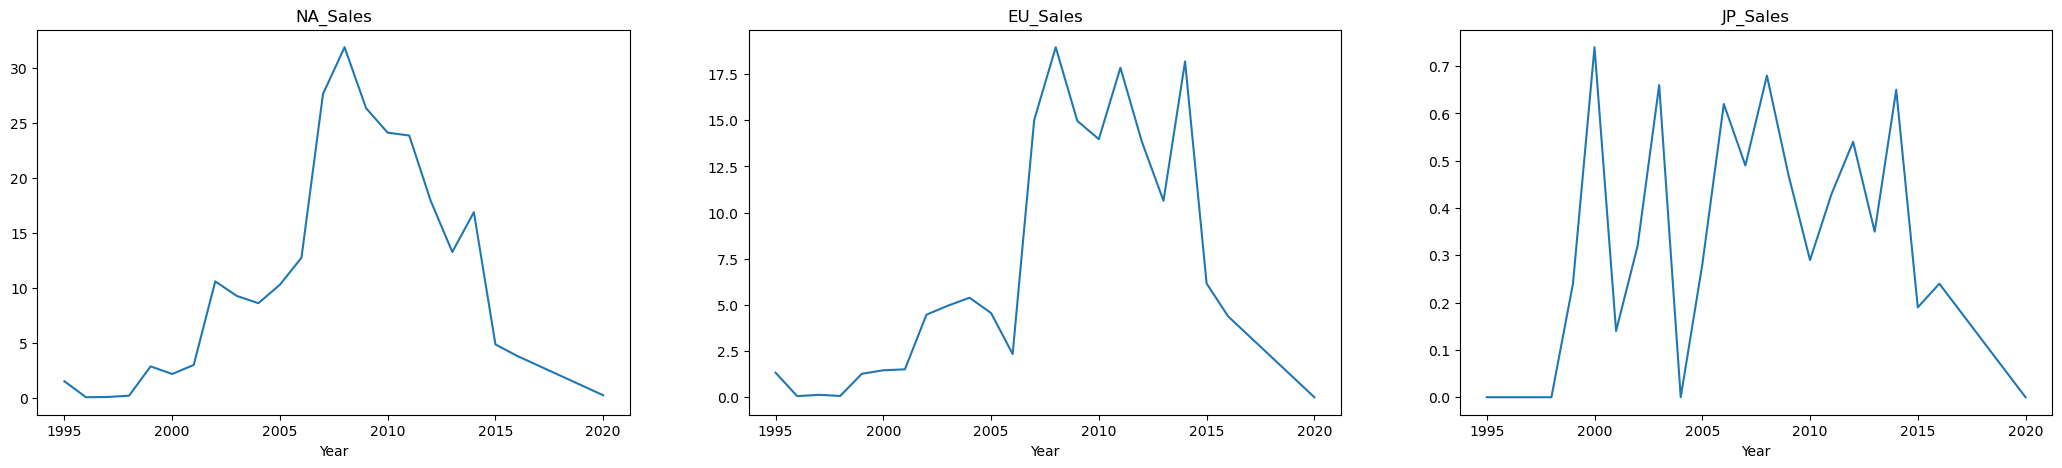

In [48]:
udf = df[df['Publisher'] == 'Ubisoft']
udf = udf.groupby(by='Year').sum()[lista1].reset_index()

fig, axes = plt.subplots(1, 3, figsize=(26, 5))

sns.lineplot(data=udf, x='Year', y='NA_Sales', ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('NA_Sales')

sns.lineplot(data=udf, x='Year', y='EU_Sales', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('EU_Sales')

sns.lineplot(data=udf, x='Year', y='JP_Sales', ax=axes[2])
axes[2].set_ylabel('')
axes[2].set_title('JP_Sales')

plt.show()

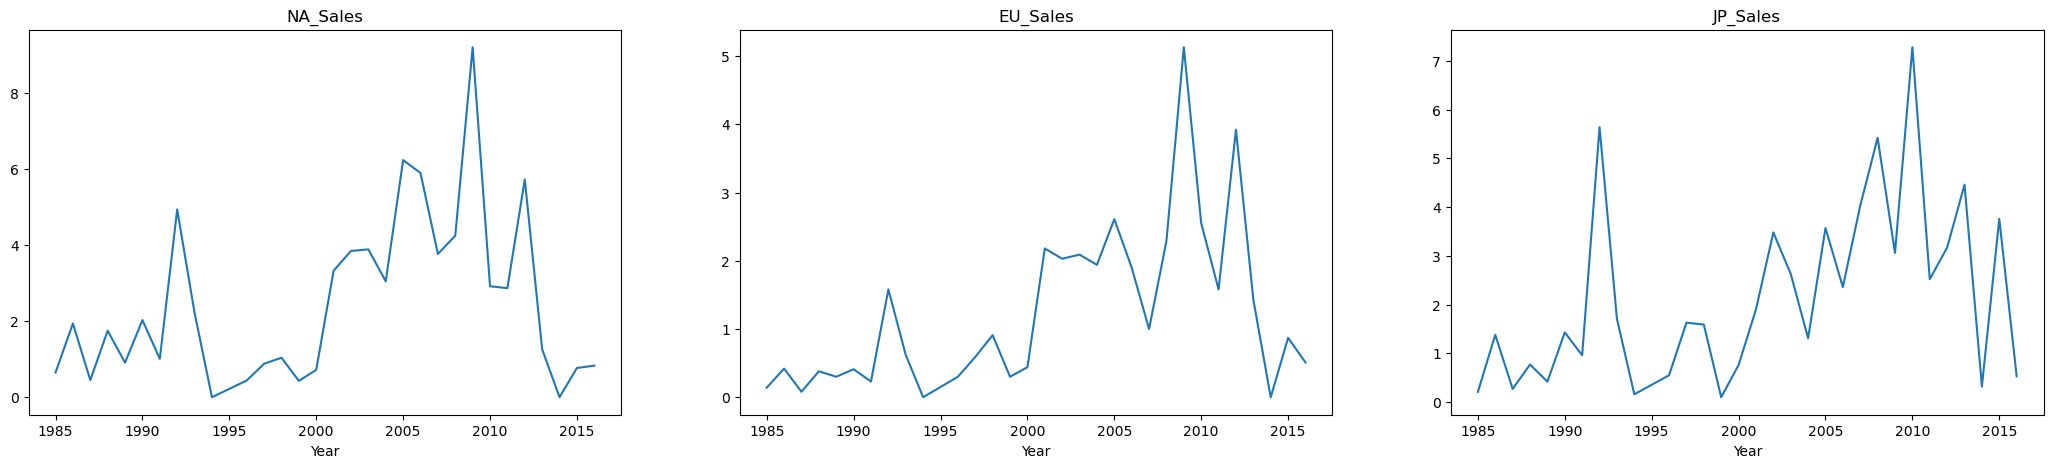

In [49]:
capdf = df[df['Publisher'] == 'Capcom']
capdf = capdf.groupby(by='Year').sum()[lista1].reset_index()

fig, axes = plt.subplots(1, 3, figsize=(26, 5))

sns.lineplot(data=capdf, x='Year', y='NA_Sales', ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('NA_Sales')

sns.lineplot(data=capdf, x='Year', y='EU_Sales', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('EU_Sales')

sns.lineplot(data=capdf, x='Year', y='JP_Sales', ax=axes[2])
axes[2].set_ylabel('')
axes[2].set_title('JP_Sales')

plt.show()